Importing all the libraries

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Reading the data set

In [290]:
data_set=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/PracticeProjets/happiness_score_dataset.csv')
data_set.head()

In [292]:
data_set.shape

(158, 12)

In [293]:
data_set.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#No null values in the data set

In [294]:
data_set['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [295]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder

In [296]:
l_enc=LabelEncoder()
#applying label encoding to Region and Country
data_set['Region']=l_enc.fit_transform(data_set['Region'])
data_set['Country']=l_enc.fit_transform(data_set['Country'])

In [298]:
data_set.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


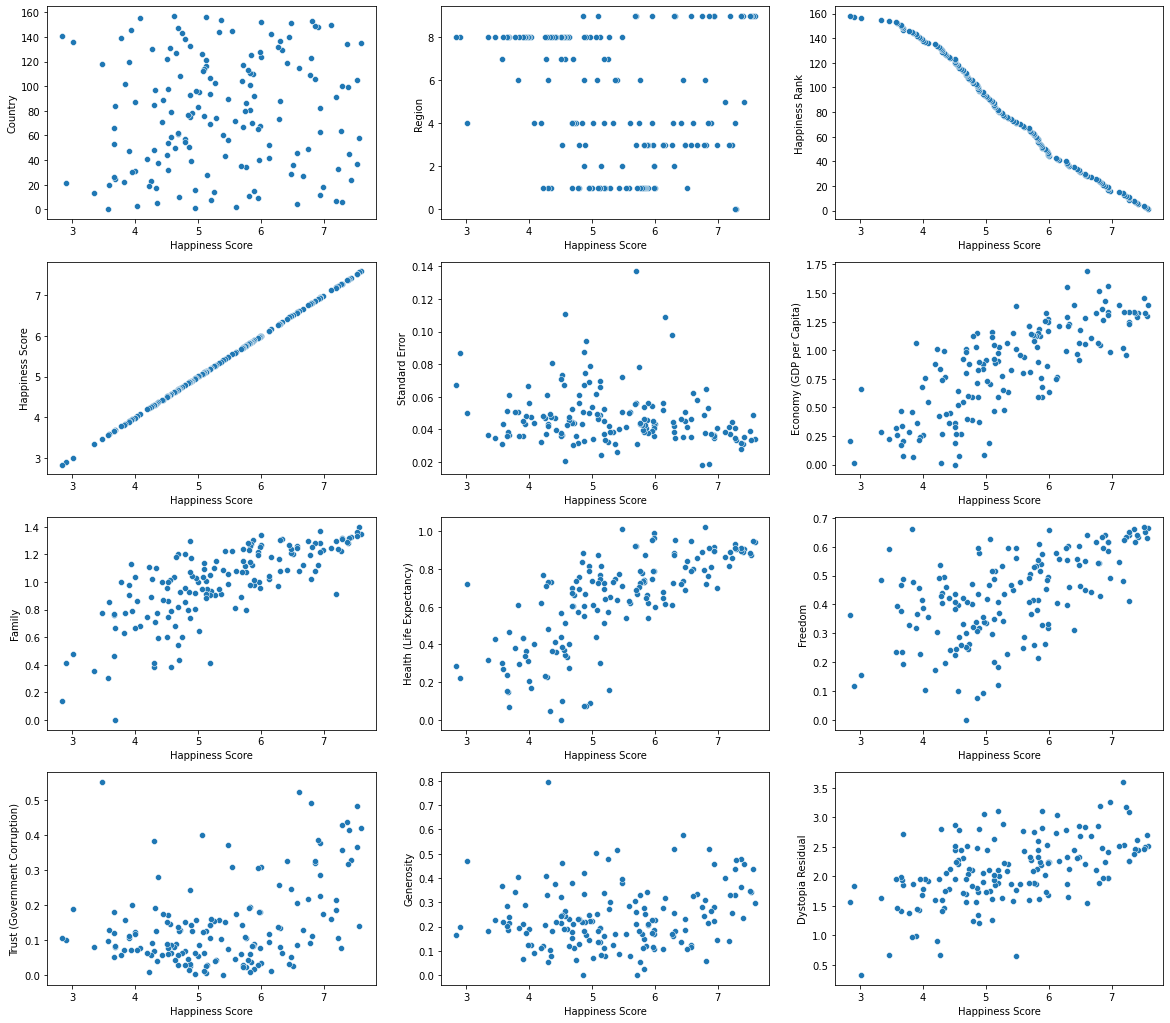

In [299]:
plt.figure(figsize=(20,18))
pltno=1
for col in data_set.columns:
    ax=plt.subplot(4,3,pltno)
    sns.scatterplot(data_set['Happiness Score'],data_set[col])
    plt.xlabel('Happiness Score')
    plt.ylabel(col)  
    pltno+=1
plt.show()

Observations
1. Country and Region is not contributing to any trend.
1. Also could not see any trend for standard error,Generosity
2. Trust contributing little more than standard error and Generosity
4. Happiness Rank is negatively related with Happiness score.(i.e. When happiness score increases, Happiness Rank decreases).
5. Economy, Family,Health,Freedom,Dystopia having positive relation with Happiness score.

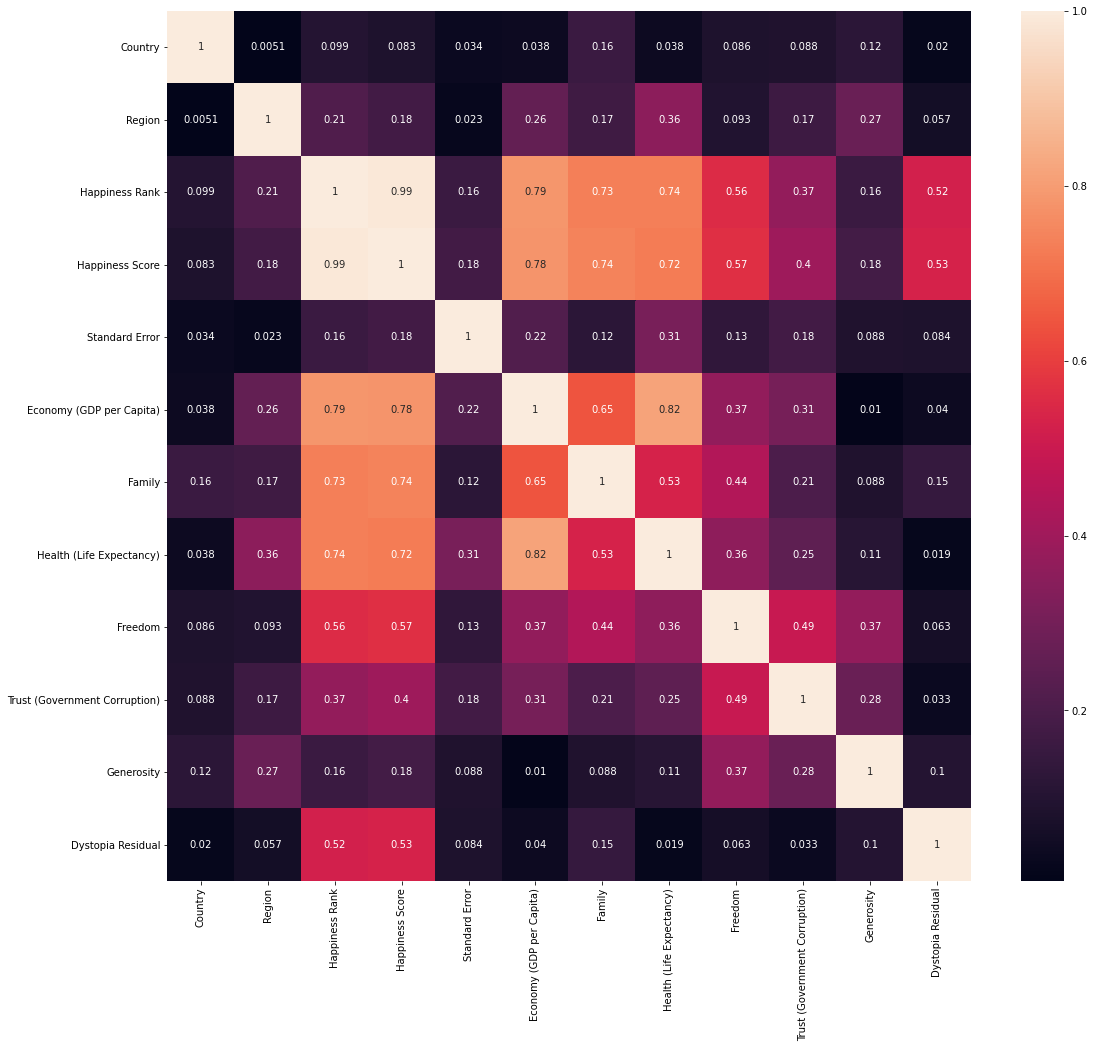

In [300]:
data_cor=data_set.corr().abs()
plt.figure(figsize=(18,16))
sns.heatmap(data_cor,annot=True)
plt.show()

Observations
1. Happiness Rank is highly related with happiness score
2. Economy and Health are correlated with 82%
3. Happiness Rank and Economy are correlated with 79%
4. Happiness Rank and Health are correlated with 74%
5. Happiness Rank and Family are correlated with 73%
6. County is not contributing much to Happiness Score
7. Region also having less contribution

In [301]:
#So will remove Country - as scatter plot and heatmap both shows there is no contribution of this field.
data_set.drop(['Country'],axis=1,inplace=True)

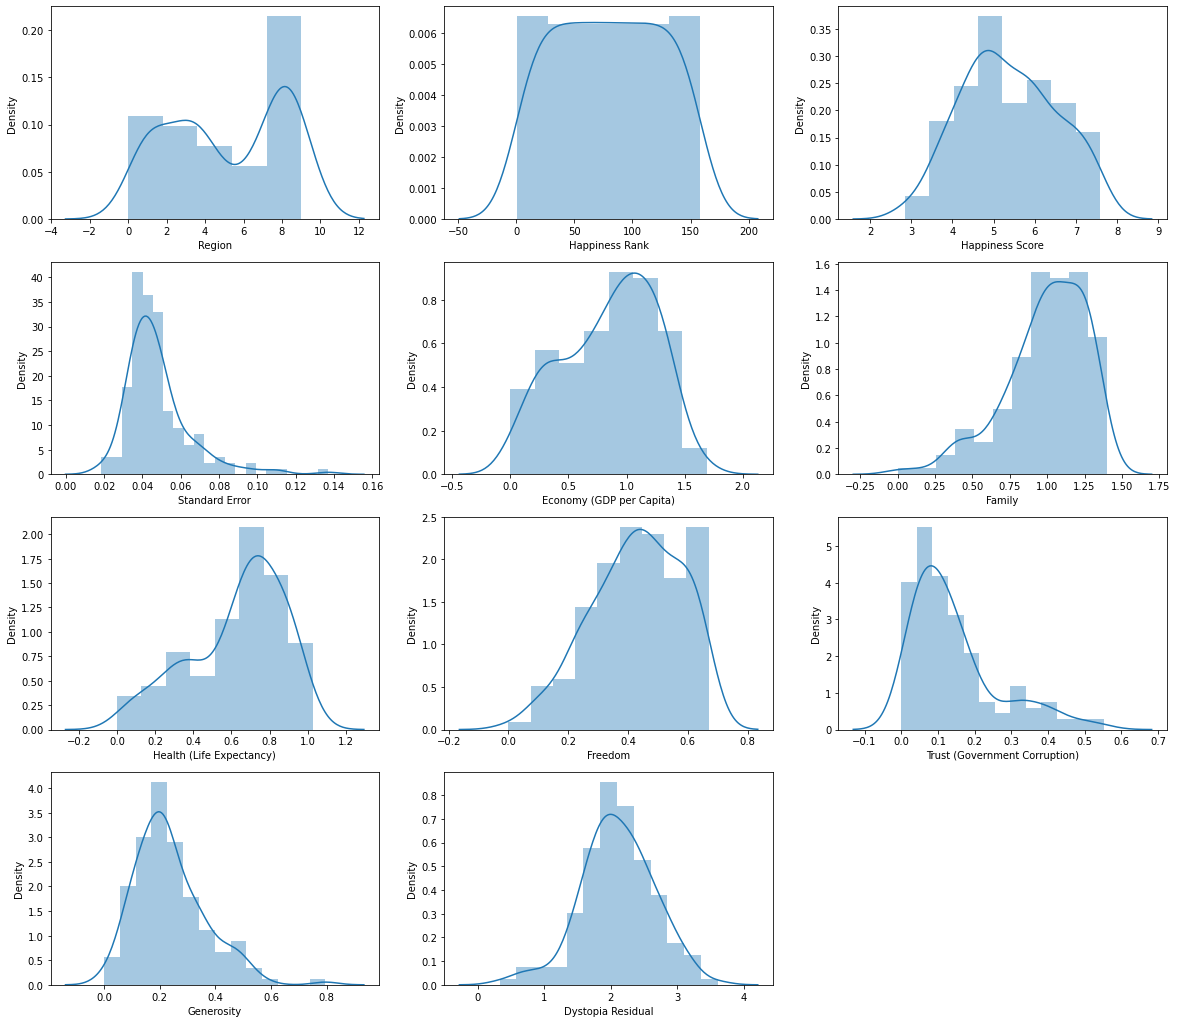

In [302]:
plt.figure(figsize=(20,18))
pltno=1
for col in data_set.columns:
    ax=plt.subplot(4,3,pltno)
    sns.distplot(data_set[col])
    pltno+=1
plt.show()

Observations from above distribution plot
1. Looks like standard error,family,heath,Trust having outliers(or skewed data)

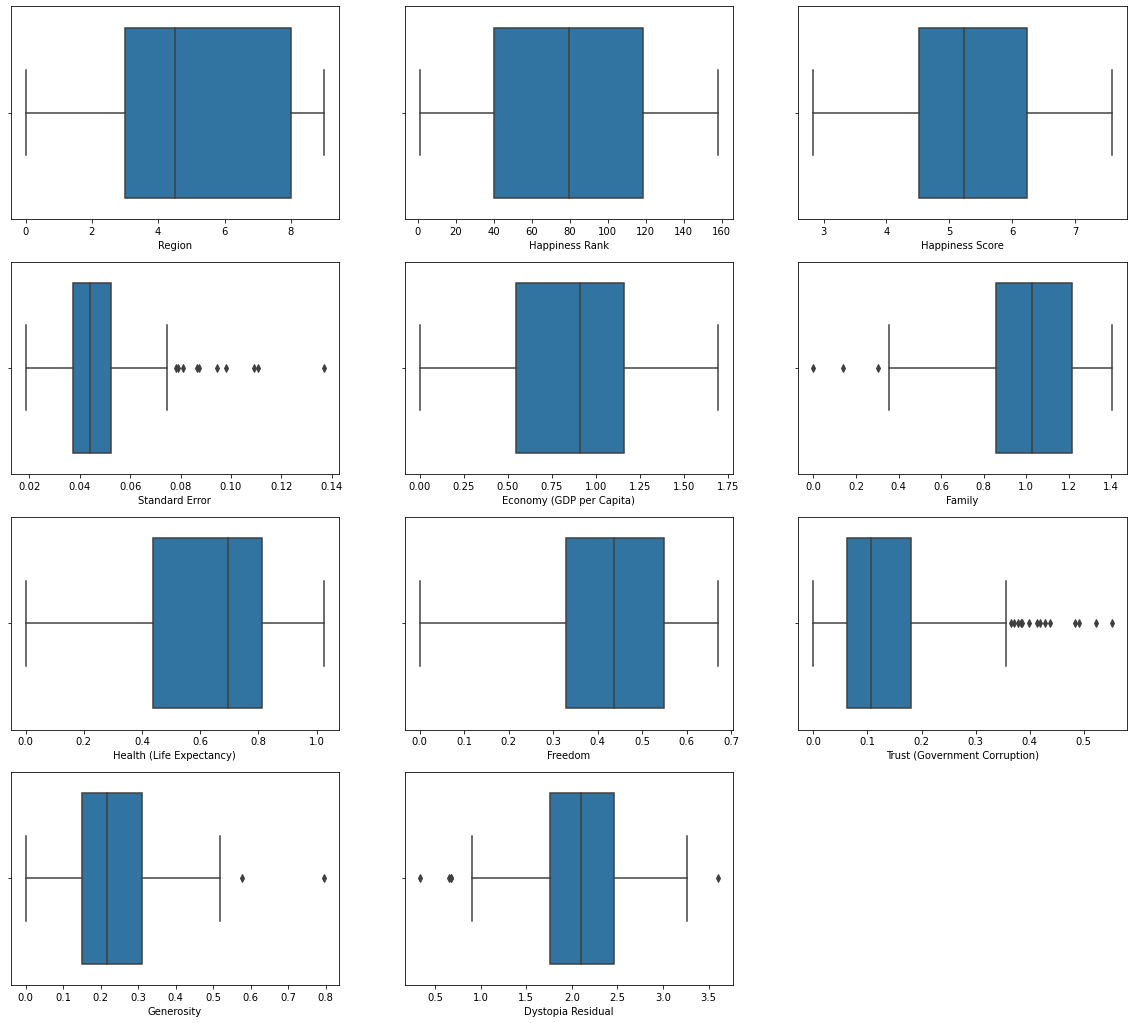

In [303]:
plt.figure(figsize=(20,18))
pltno=1
for col in data_set.columns:
    ax=plt.subplot(4,3,pltno)
    sns.boxplot(data_set[col])
    pltno+=1
plt.show()

Observations
-- It is confirmed via boxplot that standard error and Trust having outliers

**Conclusion from above: We have some outliers, but sine our data set is too small, will go ahead with outliers and train the model and see really these outliers are impacting the model accuracy.

In [334]:
X=data_set.drop(['Happiness Score'],axis=1)
y=data_set['Happiness Score']
scale=StandardScaler()
#Applying standard scalar to the Feature data X
X_scale=scale.fit_transform(X)

In [305]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [307]:
#Splitting the data as train and test data
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.2,random_state=120)
lr=LinearRegression()
lr.fit(X_train,y_train)

In [328]:
#importing Pickle
import pickle

In [329]:
#Saving the model using pickle
pickle.dump(lr,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/WorldHappinessModel.pkl','wb'))

In [332]:
#Loading the model using pickle
linear_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/WorldHappinessModel.pkl','rb'))

In [333]:
train_pred_y=linear_model.predict(X_train)
test_pred_y=linear_model.predict(X_test)
print("Training score: ",linear_model.score(X_train,y_train))
print("Test score: ",linear_model.score(X_test,y_test))

Training score:  0.9999999389638142
Test score:  0.9999999500426101


##With Linear Regression model we able to get upto 99.9% of training and test accuracy.

In [327]:
print("Mean squared error(MSE): ",mean_squared_error(y_test,test_pred_y))
print("Mean Absolute Error: ",mean_absolute_error(y_test,test_pred_y))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,test_pred_y)))

Mean squared error(MSE):  7.283410244076167e-08
Mean Absolute Error:  0.00023402823810821094
Root Mean squared error:  0.00026987793989276276


The above Metrics of Mean Squared Error and Mean Absolute Error and Root Mean Squared Errors, shows that our model performs with very minimal errors.

In [313]:
#importing Lasso and Ridge regularizations
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [322]:
lcv=LassoCV(alphas=None,max_iter=1000,normalize=True) #LassoCV helps to find the best alpha
lcv.fit(X_train,y_train)
ls=Lasso(lcv.alpha_)
ls.fit(X_train,y_train)
print("Test score using Lasso: ",ls.score(X_train,y_train))
print("Test score using Lasso: ",ls.score(X_test,y_test))

Test score using Lasso:  0.9999993515052558
Test score using Lasso:  0.9999994012741722


In [323]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(X_train,y_train)
rd=Ridge(ridgecv.alpha_)
rd.fit(X_train,y_train)
print("Train score using Ridge: ",rd.score(X_train,y_train))
print("Train score using Ridge: ",rd.score(X_test,y_test))

Train score using Ridge:  0.9999999377222916
Train score using Ridge:  0.999999950940272


Conclusion: 
    1.Based on above Lasso and Ridge regularization techniques, we can say our model is not over fitting as we get almost same result with linear regression model.
    2.As our model performs better without removing any outliers, it is not mandatory to clean the outliers.